In [1]:
import scanpy as sc
import mudata as md
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

import os
import sys
sys.path.append('../')

from gglasso.helper.basic_linalg import scale_array_by_diagonal
from scipy.cluster.hierarchy import linkage

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
ec_mudata = md.read("../data/preprocessed/ec_mudata_preprocessed.h5mu")

ec_mrna_gc5 = ec_mudata["gc5_genes"][:, ~ec_mudata["gc5_genes"].var["rRNA"]].copy()
ec_rrna_gc5 = ec_mudata["gc5_genes"][:, ec_mudata["gc5_genes"].var["rRNA"]].copy()
ec_mrna_gc1 = ec_mudata["gc1_genes"][:, ~ec_mudata["gc1_genes"].var["rRNA"]].copy()
ec_rrna_gc1 = ec_mudata["gc1_genes"][:, ec_mudata["gc1_genes"].var["rRNA"]].copy()

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\mudata\_core\mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [3]:
efm_mudata = md.read("../data/preprocessed/efm_mudata_preprocessed.h5mu")

efm_mrna_gc5 = efm_mudata["gc5_genes"][:, ~efm_mudata["gc5_genes"].var["rRNA"]].copy()
efm_rrna_gc5 = efm_mudata["gc5_genes"][:, efm_mudata["gc5_genes"].var["rRNA"]].copy()
efm_mrna_gc1 = efm_mudata["gc1_genes"][:, ~efm_mudata["gc1_genes"].var["rRNA"]].copy()
efm_rrna_gc1 = efm_mudata["gc1_genes"][:, efm_mudata["gc1_genes"].var["rRNA"]].copy()

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\mudata\_core\mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [4]:
psa_mudata = md.read("../data/preprocessed/psa_mudata_preprocessed.h5mu")

psa_mrna_gc5 = psa_mudata["gc5_genes"][:, ~psa_mudata["gc5_genes"].var["rRNA"]].copy()
psa_rrna_gc5 = psa_mudata["gc5_genes"][:, psa_mudata["gc5_genes"].var["rRNA"]].copy()
psa_mrna_gc1 = psa_mudata["gc1_genes"][:, ~psa_mudata["gc1_genes"].var["rRNA"]].copy()
psa_rrna_gc1 = psa_mudata["gc1_genes"][:, psa_mudata["gc1_genes"].var["rRNA"]].copy()

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\mudata\_core\mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [5]:
kp_mudata = md.read("../data/preprocessed/kp_mudata_preprocessed.h5mu")

kp_mrna_gc5 = kp_mudata["gc5_genes"][:, ~kp_mudata["gc5_genes"].var["rRNA"]].copy()
kp_rrna_gc5 = kp_mudata["gc5_genes"][:, kp_mudata["gc5_genes"].var["rRNA"]].copy()
kp_mrna_gc1 = kp_mudata["gc1_genes"][:, ~kp_mudata["gc1_genes"].var["rRNA"]].copy()
kp_rrna_gc1 = kp_mudata["gc1_genes"][:, kp_mudata["gc1_genes"].var["rRNA"]].copy()

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\mudata\_core\mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [6]:
prec_matrices_files = os.listdir("../data/precision_matrices/4S/")

mrna_gc5_lc_files = [f for f in prec_matrices_files if f.endswith('mrna_gc5_lc.npy')]
mrna_gc1_lc_files = [f for f in prec_matrices_files if f.endswith('mrna_gc1_lc.npy')]
mrna_gc1_pc_files = [f for f in prec_matrices_files if f.endswith('mrna_gc1_pc.npy')]
rrna_gc1_lc_foles = [f for f in prec_matrices_files if f.endswith('rrna_gc1_lc.npy')]

In [7]:
mrna_gc5_lc_dicts = {f.split('_')[0]: np.load("../data/precision_matrices/4S/"+f, allow_pickle=True) for f in mrna_gc5_lc_files}
mrna_gc1_lc_dicts = {f.split('_')[0]: np.load("../data/precision_matrices/4S/"+f, allow_pickle=True) for f in mrna_gc1_lc_files}
mrna_gc1_pc_dicts = {f.split('_')[0]: np.load("../data/precision_matrices/4S/"+f, allow_pickle=True) for f in mrna_gc1_pc_files}
rrna_gc1_lc_dicts = {f.split('_')[0]: np.load("../data/precision_matrices/4S/"+f, allow_pickle=True) for f in rrna_gc1_lc_foles}

In [8]:
string_files = os.listdir("../data/string/4S/")
mapping_files = [f for f in string_files if "mapping" in f]
interaction_files = [f for f in string_files if "interactions_short" in f]

mapping_dict = {mapping.split('_')[0]: pd.read_csv(f"../data/string/4S/{mapping}", sep="\t" ) for mapping in mapping_files}
interaction_dict = {network.split('_')[0]: pd.read_csv(f"../data/string/4S/{network}", sep="\t" ) for network in interaction_files}

In [9]:
mapping_dict["ec"].head()

,#queryIndex,queryItem,stringId,preferredName,annotation
0,2,protein chain elongation factor EF-G,386585.gene:10367269,ECs4191,GTP-binding protein chain elongation factor EF...
1,4,RNA polymerase beta prime subunit,386585.gene:10368018,ECs4911,RNA polymerase beta prime subunit; Similar to ...
2,5,RNA polymerase alpha subunit,386585.gene:10367238,ECs4160,"RNA polymerase, alpha subunit; Similar to RPOA..."
3,6,RNA polymerase beta subunit,386585.gene:10368017,ECs4910,RNA polymerase beta subunit; Similar to RPOB_E...
4,8,formate C-acetyltransferase,386585.gene:10363988,ECs0986,Formate acetyltransferase 1; Similar to PFLB_E...


In [10]:
interaction_dict["ec"].head()

,#node1,node2,node1_string_id,node2_string_id,neighborhood_on_chromosome,gene_fusion,phylogenetic_cooccurrence,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,combined_score
0,ECs0029,ECs3639,386585.gene:10363007,386585.gene:10366699,0.069,0.0,0.247,0.0,0.051,0.000,0.0,0.230,0.419
1,ECs0029,ECs4910,386585.gene:10363007,386585.gene:10368017,0.104,0.0,0.000,0.0,0.211,0.076,0.0,0.230,0.429
2,ECs0029,ECs1846,386585.gene:10363007,386585.gene:10364862,0.061,0.0,0.000,0.0,0.073,0.000,0.0,0.414,0.445
3,ECs0029,ECs4911,386585.gene:10363007,386585.gene:10368018,0.102,0.0,0.000,0.0,0.290,0.000,0.0,0.230,0.466
4,ECs0029,ECs4191,386585.gene:10363007,386585.gene:10367269,0.115,0.0,0.000,0.0,0.280,0.000,0.0,0.292,0.509


In [11]:
def annotate_dataset_with_string_ids(adata, mapping):

    for i, row in mapping.iterrows():
        query = row["queryItem"]
        target_index = adata.var.loc[adata.var["protein_name"].str.contains(query)].index
        for j in target_index:
            adata.var.loc[j, "string_id"] = row["stringId"]
        

In [12]:
annotate_dataset_with_string_ids(adata=ec_mrna_gc1, mapping=mapping_dict["ec"])

C:\Users\Jan\AppData\Local\Temp\ipykernel_1984\2183691754.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  target_index = adata.var.loc[adata.var["protein_name"].str.contains(query)].index


In [13]:
ec_mrna_gc1.var["protein_name_short"] = ec_mrna_gc1.var["protein_name"].str.split("[").str[0]
ec_mrna_gc1.var["protein_name_short"] = ec_mrna_gc1.var["protein_name_short"].str.split(" ").str[1:].str.join(" ")

In [14]:
annotate_dataset_with_string_ids(adata=efm_mrna_gc1, mapping=mapping_dict["efm"])

C:\Users\Jan\AppData\Local\Temp\ipykernel_1984\2183691754.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  target_index = adata.var.loc[adata.var["protein_name"].str.contains(query)].index


In [24]:
efm_mrna_gc1.var["protein_name_short"] = efm_mrna_gc1.var["protein_name"].str.split("[").str[0]
efm_mrna_gc1.var["protein_name_short"] = efm_mrna_gc1.var["protein_name_short"].str.split(" ").str[1:].str.join(" ")

In [15]:
annotate_dataset_with_string_ids(adata=psa_mrna_gc1, mapping=mapping_dict["psa"])

C:\Users\Jan\AppData\Local\Temp\ipykernel_1984\2183691754.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  target_index = adata.var.loc[adata.var["protein_name"].str.contains(query)].index


In [67]:
psa_mrna_gc1.var["protein_name_short"] = psa_mrna_gc1.var["protein_name"].str.split("[").str[0]
psa_mrna_gc1.var["protein_name_short"] = psa_mrna_gc1.var["protein_name_short"].str.split(" ").str[1:].str.join(" ")

In [16]:
annotate_dataset_with_string_ids(adata=kp_mrna_gc1, mapping=mapping_dict["kp"])

C:\Users\Jan\AppData\Local\Temp\ipykernel_1984\2183691754.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  target_index = adata.var.loc[adata.var["protein_name"].str.contains(query)].index


In [68]:
kp_mrna_gc1.var["protein_name_short"] = kp_mrna_gc1.var["protein_name"].str.split("[").str[0]
kp_mrna_gc1.var["protein_name_short"] = kp_mrna_gc1.var["protein_name_short"].str.split(" ").str[1:].str.join(" ")

In [17]:
def create_graph(adata, precision_matrix):

    n = ec_mrna_gc1.shape[1]
    num_reported_interactions = 0

    g = nx.Graph()

    for i in range(n):
        g.add_node(adata.var.iloc[i]["protein_name"])

    for i in range(n):
        for j in range(i+1, n):
            if precision_matrix[i,j] != 0:
                num_reported_interactions += 1
                g.add_edge(adata.var.iloc[i]["protein_name"], adata.var.iloc[j]["protein_name"], weight=precision_matrix[i,j])
    
    return g, num_reported_interactions

In [50]:
def create_graph_string_restricted(adata, interactions, precision_matrix):
    
        n = adata.shape[1]
        interactions_list = []

        g = nx.Graph()
    
        for i in range(n):
            for j in range(i+1, n):
                if precision_matrix[i,j] != 0:
                    a = adata.var.iloc[i]["string_id"]
                    b = adata.var.iloc[j]["string_id"]

                    interaction_ab = interactions.loc[(interactions["node1_string_id"] == a) & (interactions["node2_string_id"] == b)]["combined_score"]
                    interaction_ba = interactions.loc[(interactions["node1_string_id"] == b) & (interactions["node2_string_id"] == a)]["combined_score"]

                    if len(interaction_ab) > 0 or len(interaction_ba) > 0:
                        interactions_list.append((adata.var.iloc[i]['protein_name_short'], adata.var.iloc[j]['protein_name_short']))
                        g.add_node(adata.var.iloc[i]['protein_name_short'])
                        g.add_node(adata.var.iloc[j]['protein_name_short'])
                        g.add_edge(adata.var.iloc[i]['protein_name_short'], 
                                   adata.var.iloc[j]['protein_name_short'], 
                                   weight=precision_matrix[i, j])
        
        return g, interactions_list

In [24]:
ec_mrna_gc1_lc_graph, ec_mrna_gc1_lc_interaction_list = create_graph_string_restricted(adata=ec_mrna_gc1, interactions=interaction_dict["ec"], precision_matrix=mrna_gc1_lc_dicts["ec"])

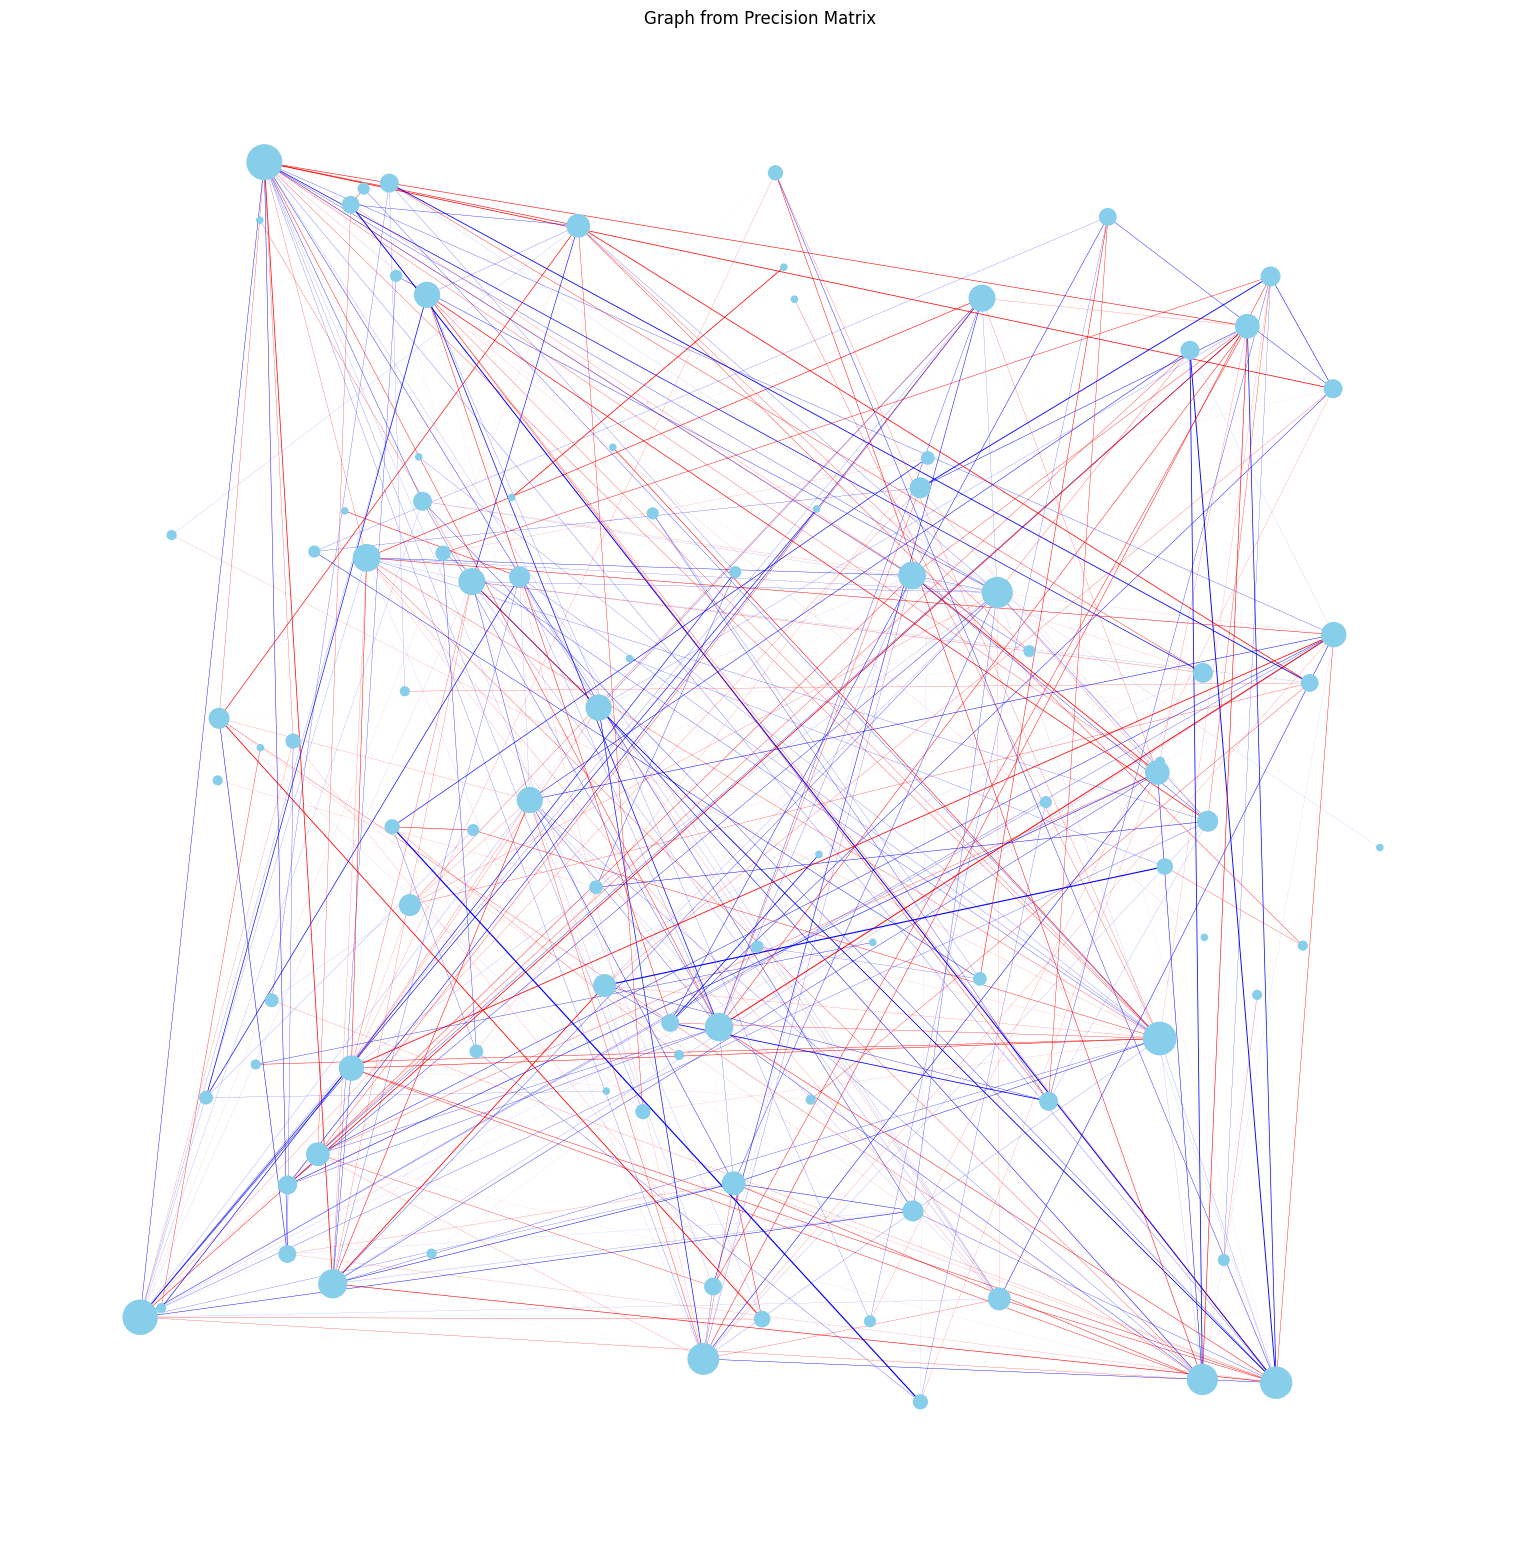

In [25]:
# scale the node size with the degree of the node
node_sizes = [val * 20 for (node, val) in ec_mrna_gc1_lc_graph.degree()]

# only print node names if degree is greater than 10
node_labels = {node: node if val > 10 else '' for (node, val) in ec_mrna_gc1_lc_graph.degree()}

# Set edge colors based on weight sign
edge_colors = []
edge_widths = []
for edge in ec_mrna_gc1_lc_graph.edges(data=True):
    weight = edge[2]['weight']
    if weight > 0:
        edge_colors.append('red')  # Positive edge
    elif weight < 0:
        edge_colors.append('blue')  # Negative edge
    edge_widths.append(abs(weight)*0.01)  # Scale width based on weight

pos = nx.random_layout(ec_mrna_gc1_lc_graph)
plt.figure(figsize=(15, 15))
nx.draw(ec_mrna_gc1_lc_graph, pos, with_labels=False, node_size=node_sizes, node_color='skyblue', font_size=10, 
        edge_color=edge_colors, width=edge_widths, labels=node_labels)
plt.title('Graph from Precision Matrix (E. Coli Experiment 1)')
plt.show()

In [31]:
# print the number of nodes and edges
print(f"Number of nodes: {ec_mrna_gc1_lc_graph.number_of_nodes()}")
print(f"Number of edges: {ec_mrna_gc1_lc_graph.number_of_edges()}")

Number of nodes: 96
Number of edges: 383


In [50]:
# list all hubs in the graph
sorted(ec_mrna_gc1_lc_graph.degree, key=lambda x: x[1], reverse=True)[:10]

[('methionyl-tRNA synthetase ', 31),
 ('translation initiation factor IF-2 ', 30),
 ('glutamate synthase large subunit ', 27),
 ('DNA topoisomerase I ', 25),
 ('protein chain elongation factor EF-G ', 24),
 ('RNA polymerase beta subunit ', 23),
 ('phenylalanine tRNA synthetase beta subunit ', 23),
 ('RNA polymerase alpha subunit ', 20),
 ('threonyl-tRNA synthetase ', 19),
 ('DNA gyrase GyrB ', 18)]

In [17]:
ec_mrna_gc1_pc_graph, ec_mrna_gc1_pc_interaction_list = create_graph_string_restricted(adata=ec_mrna_gc1, interactions=interaction_dict["ec"], precision_matrix=mrna_gc1_pc_dicts["ec"])

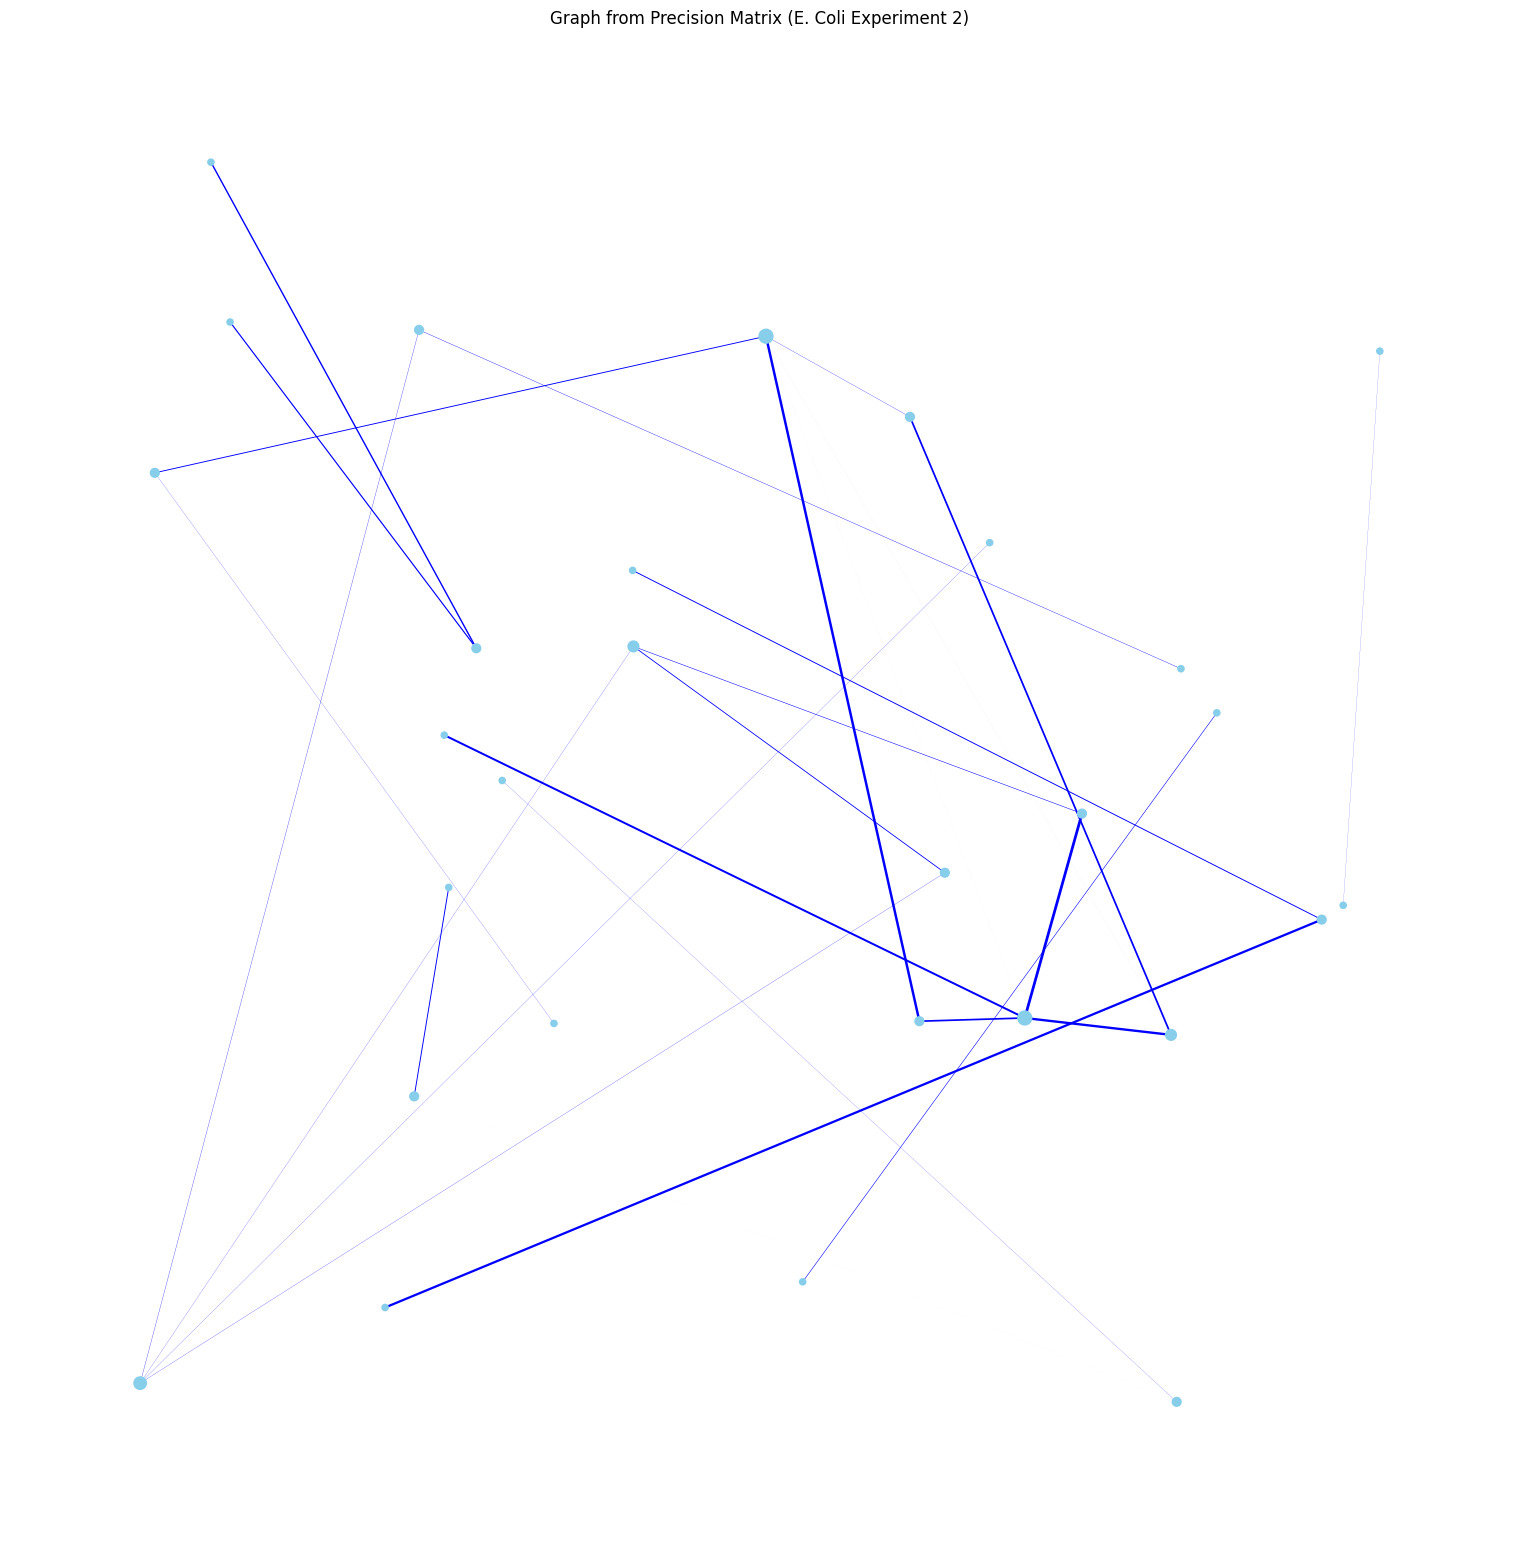

In [22]:
# scale the node size with the degree of the node
node_sizes = [val * 20 for (node, val) in ec_mrna_gc1_pc_graph.degree()]

# only print node names if degree is greater than 10
node_labels = {node: node if val > 10 else '' for (node, val) in ec_mrna_gc1_pc_graph.degree()}

# Set edge colors based on weight sign
edge_colors = []
edge_widths = []
for edge in ec_mrna_gc1_pc_graph.edges(data=True):
    weight = edge[2]['weight']
    if weight > 0:
        edge_colors.append('red')  # Positive edge
    elif weight < 0:
        edge_colors.append('blue')  # Negative edge
    edge_widths.append(abs(weight)*20)  # Scale width based on weight

pos = nx.random_layout(ec_mrna_gc1_pc_graph)
plt.figure(figsize=(15, 15))
nx.draw(ec_mrna_gc1_pc_graph, pos, with_labels=False, node_size=node_sizes, node_color='skyblue', font_size=10, 
        edge_color=edge_colors, width=edge_widths, labels=node_labels)
plt.title('Graph from Precision Matrix (E. Coli Experiment 2)')
plt.show()

In [41]:
# how many nodes are in the graph
print(len(ec_mrna_gc1_lc_graph.nodes))
# how many edges are in the graph
print(len(ec_mrna_gc1_lc_graph.edges))

96
383


In [29]:
# check how many entries in ec_mrna_gc1_lc_interaction_list are also in ec_mrna_gc1_pc_interaction_list
len(set(ec_mrna_gc1_lc_interaction_list) & set(ec_mrna_gc1_pc_interaction_list))

27

In [30]:
#check how many nodes in ec_mrna_gc1_pc_graph are also in ec_mrna_gc1_lc_graph
len(set(ec_mrna_gc1_pc_graph.nodes) & set(ec_mrna_gc1_lc_graph.nodes))

29

In [51]:
efm_mrna_gc1_lc_graph, efm_mrna_gc1_lc_interaction_list = create_graph_string_restricted(adata=efm_mrna_gc1, interactions=interaction_dict["efm"], precision_matrix=mrna_gc1_lc_dicts["efm"])

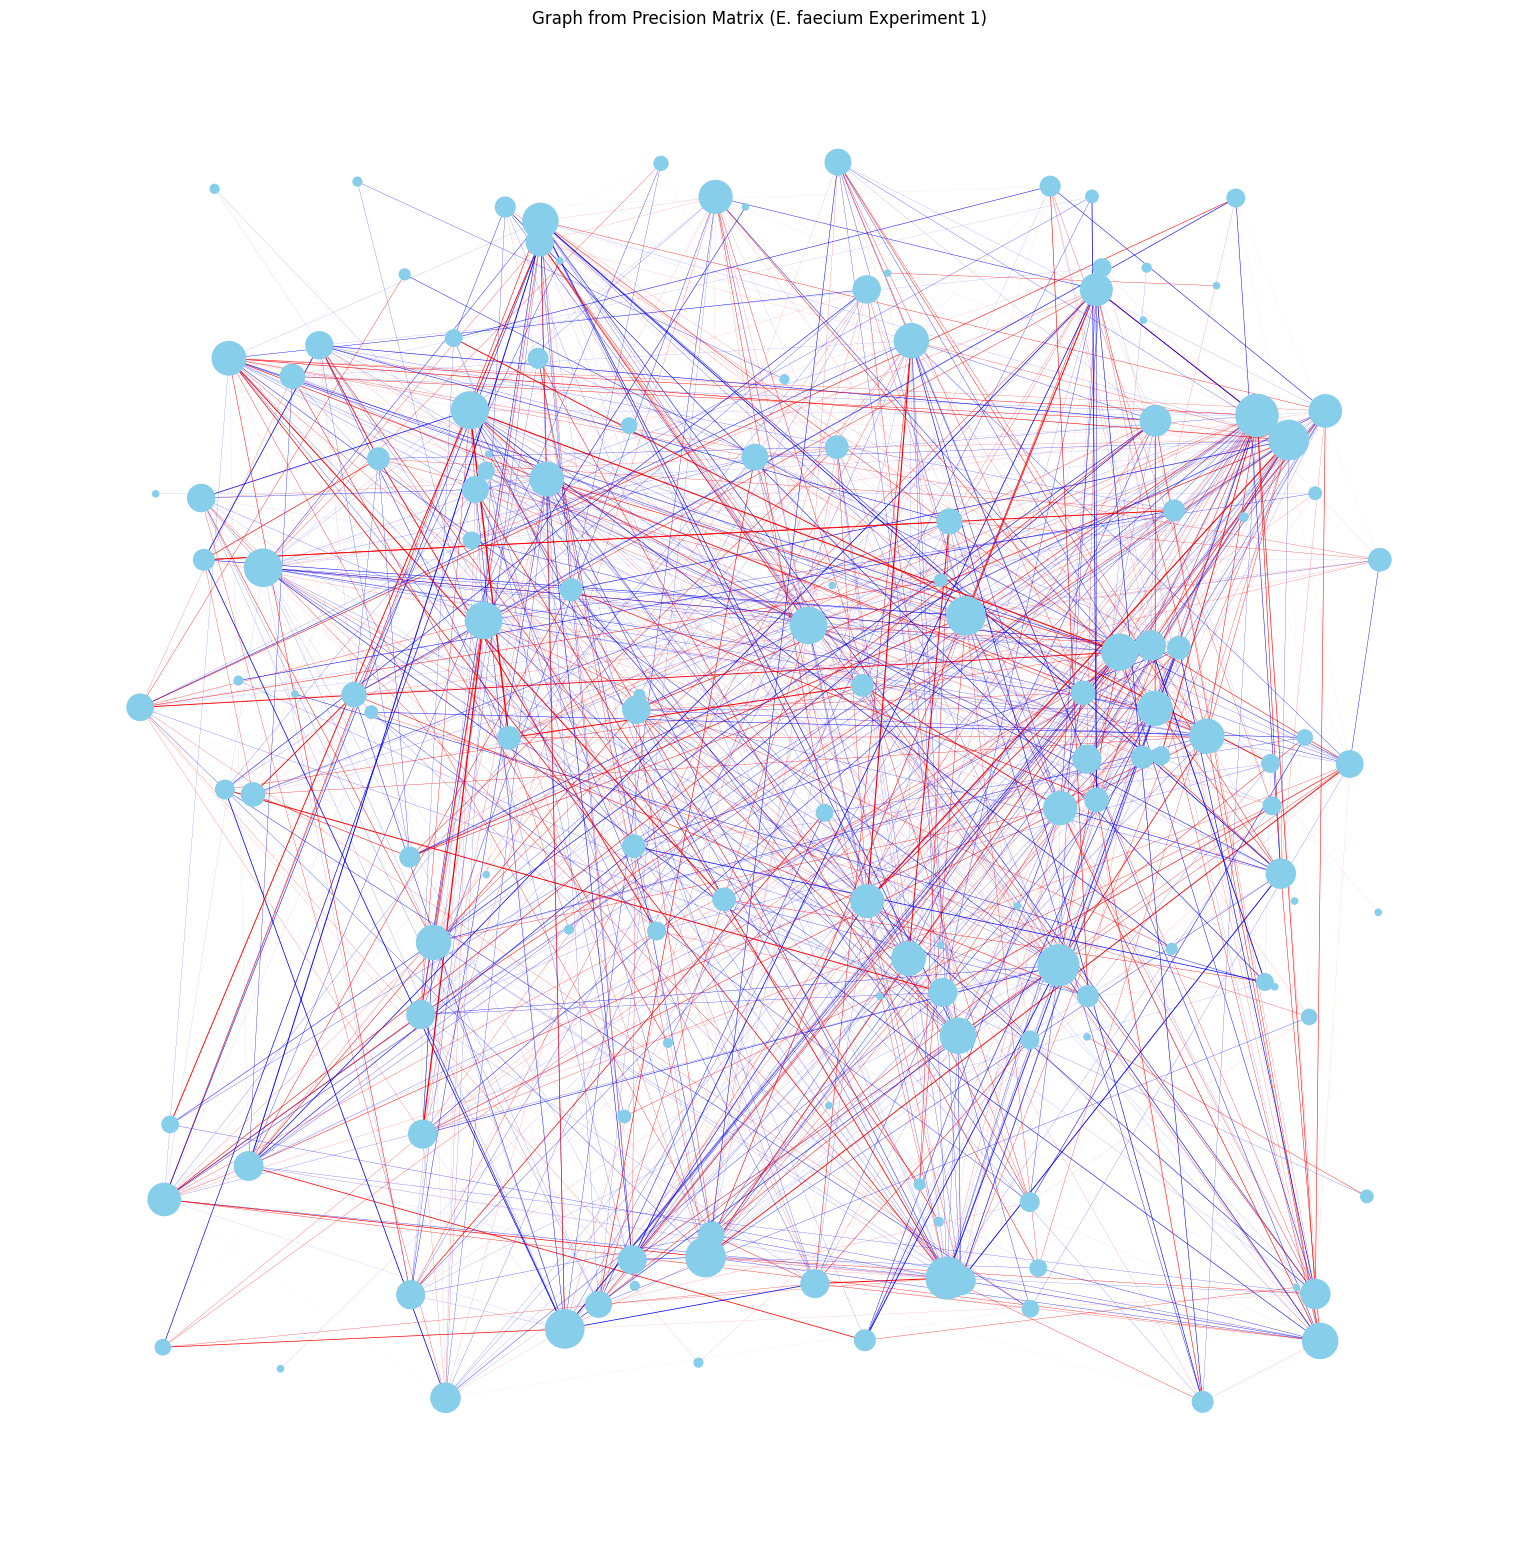

In [52]:
# scale the node size with the degree of the node
node_sizes = [val * 20 for (node, val) in efm_mrna_gc1_lc_graph.degree()]

# only print node names if degree is greater than 10
node_labels = {node: node if val > 10 else '' for (node, val) in efm_mrna_gc1_lc_graph.degree()}

# Set edge colors based on weight sign
edge_colors = []
edge_widths = []
for edge in efm_mrna_gc1_lc_graph.edges(data=True):
    weight = edge[2]['weight']
    if weight > 0:
        edge_colors.append('red')  # Positive edge
    elif weight < 0:
        edge_colors.append('blue')  # Negative edge
    edge_widths.append(abs(weight)*0.01)  # Scale width based on weight

pos = nx.random_layout(efm_mrna_gc1_lc_graph)
plt.figure(figsize=(15, 15))
nx.draw(efm_mrna_gc1_lc_graph, pos, with_labels=False, node_size=node_sizes, node_color='skyblue', font_size=10, 
        edge_color=edge_colors, width=edge_widths, labels=node_labels)
plt.title('Graph from Precision Matrix (E. faecium Experiment 1)')
plt.show()

In [53]:
# print the number of nodes and edges
print(f"Number of nodes: {efm_mrna_gc1_lc_graph.number_of_nodes()}")
print(f"Number of edges: {efm_mrna_gc1_lc_graph.number_of_edges()}")

Number of nodes: 142
Number of edges: 992


In [54]:
np.count_nonzero(np.triu(mrna_gc1_lc_dicts["efm"],k=1))

28926

In [55]:
992 / 28926

0.03429440641637281

In [56]:
efm_mrna_gc1_pc_graph, efm_mrna_gc1_pc_interaction_list = create_graph_string_restricted(adata=efm_mrna_gc1, interactions=interaction_dict["efm"], precision_matrix=mrna_gc1_pc_dicts["efm"])

In [59]:
# how many nodes are in the graph
print(len(efm_mrna_gc1_pc_graph.nodes))
# how many edges are in the graph
print(len(efm_mrna_gc1_pc_graph.edges))

23
24


In [60]:
# check how many entries in efm_mrna_gc1_lc_interaction_list are also in efm_mrna_gc1_pc_interaction_list
len(set(efm_mrna_gc1_lc_interaction_list) & set(efm_mrna_gc1_pc_interaction_list))

23

In [63]:
#check how many nodes in ec_mrna_gc1_pc_graph are also in ec_mrna_gc1_lc_graph
len(set(efm_mrna_gc1_pc_graph.nodes) & set(efm_mrna_gc1_lc_graph.nodes))

23

In [64]:
np.count_nonzero(np.triu(mrna_gc1_pc_dicts["efm"],k=1))

463

In [65]:
32/463

0.06911447084233262

In [69]:
psa_mrna_gc1_lc_graph, psa_mrna_gc1_lc_interaction_list = create_graph_string_restricted(adata=psa_mrna_gc1, interactions=interaction_dict["psa"], precision_matrix=mrna_gc1_lc_dicts["psa"])
psa_mrna_gc1_pc_graph, psa_mrna_gc1_pc_interaction_list = create_graph_string_restricted(adata=psa_mrna_gc1, interactions=interaction_dict["psa"], precision_matrix=mrna_gc1_pc_dicts["psa"])

In [73]:
# print the number of nodes and edges
print(f"Number of nodes: {psa_mrna_gc1_lc_graph.number_of_nodes()}")
print(f"Number of edges: {psa_mrna_gc1_lc_graph.number_of_edges()}")
print("Number of theta non zeros:", np.count_nonzero(np.triu(mrna_gc1_lc_dicts["psa"],k=1)))
print("% reoprted interactions:", psa_mrna_gc1_lc_graph.number_of_edges()/np.count_nonzero(np.triu(mrna_gc1_lc_dicts["psa"],k=1)))

Number of nodes: 179
Number of edges: 464
Number of theta non zeros: 27570
% reoprted interactions: 0.016829887558940878


In [74]:
# print the number of nodes and edges
print(f"Number of nodes: {psa_mrna_gc1_pc_graph.number_of_nodes()}")
print(f"Number of edges: {psa_mrna_gc1_pc_graph.number_of_edges()}")
print("Number of theta non zeros:", np.count_nonzero(np.triu(mrna_gc1_pc_dicts["psa"],k=1)))
print("% reoprted interactions:", psa_mrna_gc1_pc_graph.number_of_edges()/np.count_nonzero(np.triu(mrna_gc1_pc_dicts["psa"],k=1)))

Number of nodes: 48
Number of edges: 31
Number of theta non zeros: 1676
% reoprted interactions: 0.018496420047732696


In [75]:
kp_mrna_gc1_lc_graph, kp_mrna_gc1_lc_interaction_list = create_graph_string_restricted(adata=kp_mrna_gc1, interactions=interaction_dict["kp"], precision_matrix=mrna_gc1_lc_dicts["kp"])
kp_mrna_gc1_pc_graph, kp_mrna_gc1_pc_interaction_list = create_graph_string_restricted(adata=kp_mrna_gc1, interactions=interaction_dict["kp"], precision_matrix=mrna_gc1_pc_dicts["kp"])

In [76]:
# print the number of nodes and edges
print(f"Number of nodes: {kp_mrna_gc1_lc_graph.number_of_nodes()}")
print(f"Number of edges: {kp_mrna_gc1_lc_graph.number_of_edges()}")
print("Number of theta non zeros:", np.count_nonzero(np.triu(mrna_gc1_lc_dicts["kp"],k=1)))
print("% reoprted interactions:", kp_mrna_gc1_lc_graph.number_of_edges()/np.count_nonzero(np.triu(mrna_gc1_lc_dicts["kp"],k=1)))

Number of nodes: 46
Number of edges: 97
Number of theta non zeros: 8895
% reoprted interactions: 0.010905002810567735


In [77]:
# print the number of nodes and edges
print(f"Number of nodes: {kp_mrna_gc1_pc_graph.number_of_nodes()}")
print(f"Number of edges: {kp_mrna_gc1_pc_graph.number_of_edges()}")
print("Number of theta non zeros:", np.count_nonzero(np.triu(mrna_gc1_pc_dicts["kp"],k=1)))
print("% reoprted interactions:", kp_mrna_gc1_pc_graph.number_of_edges()/np.count_nonzero(np.triu(mrna_gc1_pc_dicts["kp"],k=1)))

Number of nodes: 4
Number of edges: 2
Number of theta non zeros: 410
% reoprted interactions: 0.004878048780487805
